<center><h1>Crimes in Vancouver</h1></center>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import zipfile

%matplotlib inline
sns.set_style('whitegrid')
current_palette = sns.color_palette()

In [2]:
zf = zipfile.ZipFile('crime_csv_all_years.zip')
crime_vancouver = pd.read_csv(zf.open('crime_csv_all_years.csv'))

In [3]:
crime_vancouver.columns = crime_vancouver.columns.str.lower()

In [4]:
crime_vancouver.describe()

,year,month,day,hour,minute,x,y
count,604815.000000,604815.000000,604815.000000,544154.000000,544154.000000,604815.000000,6.048150e+05
mean,2010.272381,6.466991,15.393985,13.723303,17.080459,442860.853025,4.909417e+06
std,5.020556,3.414385,8.749439,6.751286,18.452316,147886.179955,1.639172e+06
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2006.000000,4.000000,8.000000,9.000000,0.000000,490007.400000,5.453752e+06
50%,2010.000000,6.000000,15.000000,15.000000,11.000000,491525.980000,5.456899e+06
75%,2015.000000,9.000000,23.000000,19.000000,30.000000,493497.925000,5.458678e+06
max,2019.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5.512579e+06


In [5]:
crime_vancouver.isnull().sum()

type                 0
year                 0
month                0
day                  0
hour             60661
minute           60661
hundred_block       13
neighbourhood    63100
x                    0
y                    0
dtype: int64

## Types of crimes in Vancouver

In [6]:
crime_vancouver['type'].value_counts()

Theft from Vehicle                                        201841
Mischief                                                   81385
Break and Enter Residential/Other                          65271
Other Theft                                                62350
Offence Against a Person                                   60414
Theft of Vehicle                                           40831
Break and Enter Commercial                                 37799
Theft of Bicycle                                           29724
Vehicle Collision or Pedestrian Struck (with Injury)       24669
Vehicle Collision or Pedestrian Struck (with Fatality)       284
Homicide                                                     247
Name: type, dtype: int64

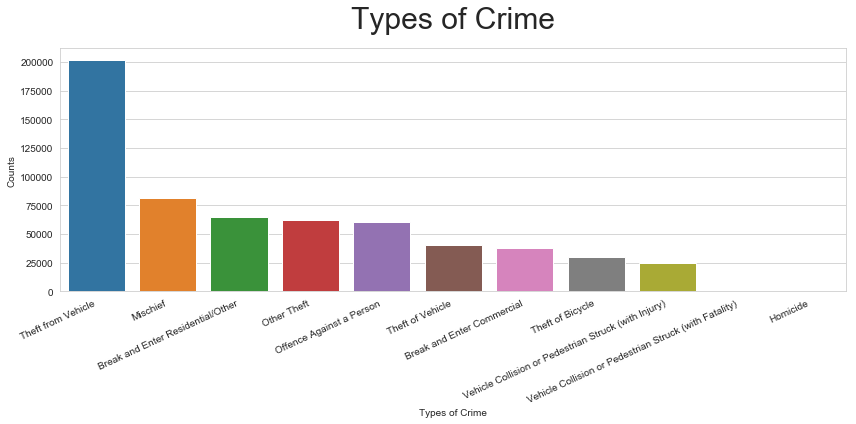

In [7]:
plt.figure(figsize=(12,6))
plt.title('Types of Crime',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='type',data=crime_vancouver, order = crime_vancouver['type'].value_counts().index,palette=current_palette)
ax.set(xlabel='Types of Crime')
ax.set(ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()
plt.savefig('types.png')

<div class="alert alert-info" role="alert">
<h3>Top 3 types of crimes in Vancouver are:</h3>
<ol>
    <li>Theft from Vehicle</li>
    <li>Mischief</li>
    <li>Break and Enter Residentail/Other</li>
</ol>
</div>

## Trends over the years

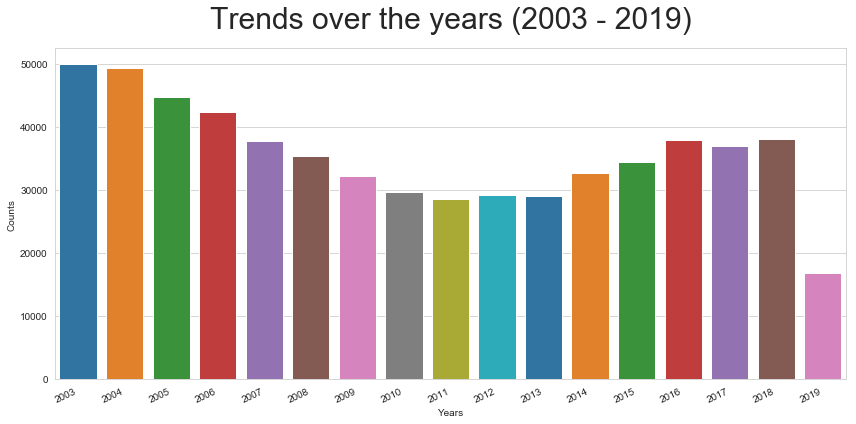

In [8]:
plt.figure(figsize=(12,6))
plt.title('Trends over the years (2003 - 2019)',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='year',data=crime_vancouver,palette=current_palette)
ax.set(xlabel='Years', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()
plt.savefig('trends.png')

<div class="alert alert-info" role="alert">
From the year 2003 to 2017 and the trends shows decresase in crime rate over the period.
</div>

## Safest area in Vancouver

In [9]:
crime_vancouver['counter'] = 1
safe_region = crime_vancouver.groupby(['neighbourhood']).count()['counter'].sort_values(ascending=True).head(10)
safe_region

neighbourhood
Musqueam               568
Stanley Park          4097
South Cambie          5838
Shaughnessy           6185
West Point Grey       6569
Arbutus Ridge         6668
Kerrisdale            8253
Dunbar-Southlands     8591
Oakridge              9031
Killarney            11556
Name: counter, dtype: int64

## Dangerous area in Vancouver

In [10]:
danger_region = crime_vancouver.groupby(['neighbourhood']).count()['counter'].sort_values(ascending=False).head(10)
danger_region

neighbourhood
Central Business District    131962
West End                      47202
Fairview                      35802
Mount Pleasant                35115
Grandview-Woodland            30746
Renfrew-Collingwood           30348
Kitsilano                     29890
Kensington-Cedar Cottage      27677
Strathcona                    24688
Hastings-Sunrise              20639
Name: counter, dtype: int64

# Months having highest crime rate

In [11]:
months = crime_vancouver.groupby(['month']).count()['counter'].sort_values(ascending=False).head(5)
months

month
5    53437
8    52690
1    52029
3    51500
6    51289
Name: counter, dtype: int64

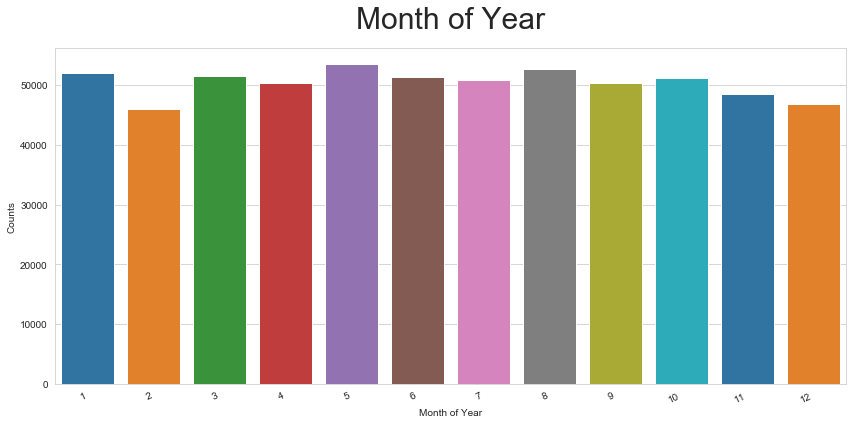

In [12]:
plt.figure(figsize=(12,6))
plt.title('Month of Year',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='month',data=crime_vancouver,palette=current_palette)
ax.set(xlabel='Month of Year')
ax.set(ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()
plt.savefig('monthsofyear.png')

# Days having highest crime rate

In [13]:
crime_vancouver.groupby(['day']).count()['counter'].sort_values(ascending=False).head(5)

day
1     22341
15    21957
12    20971
14    20851
13    20740
Name: counter, dtype: int64

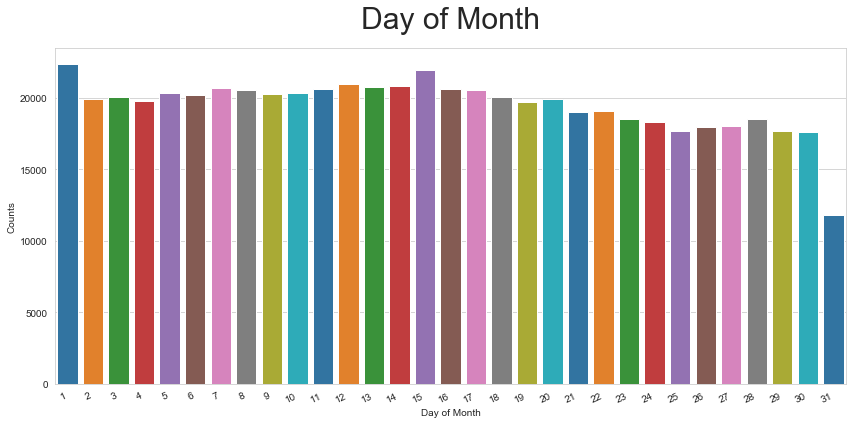

In [14]:
plt.figure(figsize=(12,6))
plt.title('Day of Month',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='day',data=crime_vancouver,palette=current_palette)
ax.set(xlabel='Day of Month')
ax.set(ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()
plt.savefig('daysofmonth.png')

# Hour having highest crime rate

In [15]:
crime_vancouver.groupby(['hour']).count()['counter'].sort_values(ascending=False).head(5)

hour
18.0    41454
17.0    36312
19.0    34167
22.0    32660
20.0    31940
Name: counter, dtype: int64

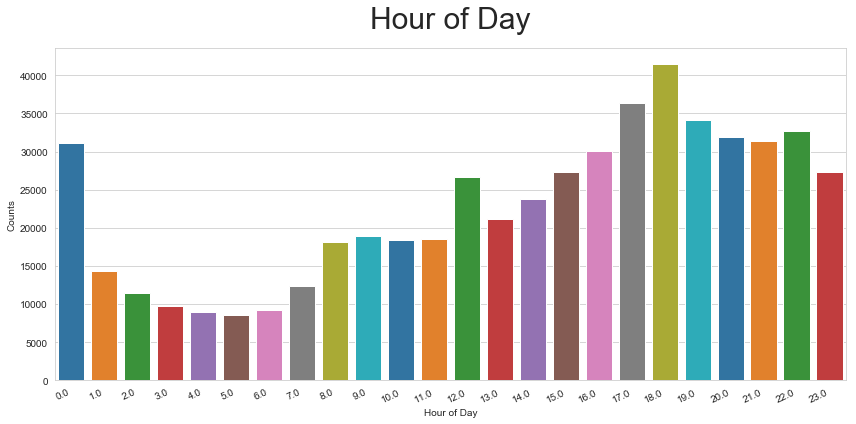

In [16]:
plt.figure(figsize=(12,6))
plt.title('Hour of Day',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='hour',data=crime_vancouver,palette=current_palette)
ax.set(xlabel='Hour of Day')
ax.set(ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()
plt.savefig('hourofday.png')